In [9]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
# 1) Собираем данные
# 2) Определить как распределены данные 
# 3) Зная распределение, мы можем уверено утверждать и опровергать гипотезы

# Основная идея
### До того как что либо произошло, мы можем говорить лишь о вероятности того или иного исхода. Распределение вероятности описывает наше предположение о вероятности всех исходов исходя из опыта (собранных данных).  

## Каждое распределение вероятностей илюстрируется графиком Функции Плотности Распределения (ФПР).


# Генерация случайных величин с заданым распределением

- https://towardsdatascience.com/bernoulli-and-binomial-random-variables-d0698288dd36 - source info
- https://habr.com/ru/post/331060/ - типичные распределения вероятностей, шпаргалка data scientist-а
- https://www.youtube.com/watch?v=8idr1WZ1A7Q&t=576s&ab_channel=3Blue1Brown - 3Blue1Brown - Binomial distributions | Probabilities of probabilities, part 1

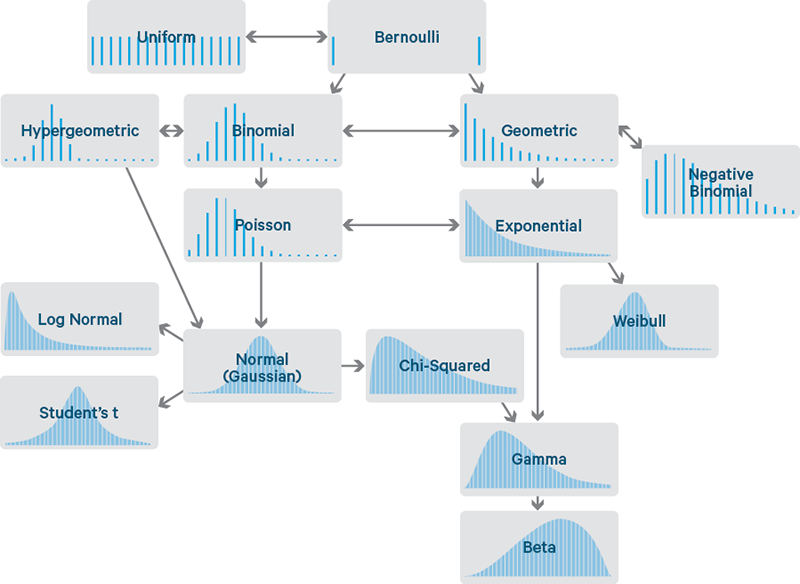

# Функции распределений

http://mathprofi.ru/nepreryvnaya_sluchaynaya_velichina.html - Непрерывная случайная величина и её функция распределения. Функция плотности распределения

#### Функция плотности вероятности (Probability Density Function, PDF) - показывает вероятность попадания случайной величины в конкретный диапазон значений
<img src="data/img/Probability Density Function.png" width="300">

#### Кумулятивная функции распределения (Cumulutive Density Function, CDF) - показывает вероятность того, что случайная величина меньше указанного значения либо равно ему. Она доступна только для количественных целевых значений.
<img src="data/img/Cumulative Density Function.png" width="300">

In [40]:
mean = 0
std = 3

sum(n): 1.2801597047469861


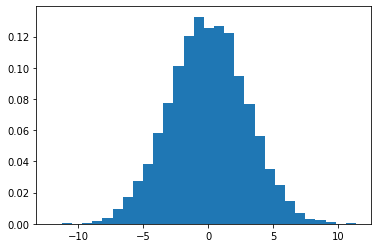

In [54]:
norm = stats.norm(mean, std)

values = pd.Series(norm.rvs(10000))

n, bins, patches = plt.hist(values, density=True, bins=30);
# print(f'n: {n}')
print(f'sum(n): {sum(n)}')
# print(f'bins: {bins}')

#### Как выяснилось n - это высоты bin-ов, и в сумме они не дают (и не должны давать) единицу. Вот если посчитать площадь всех столбиков и сложить, то получится единица. Мне нужно получить список площадей. Как это сделать?

###### Можно так

In [ ]:
obs_areas = []

for start, end, n in zip(obs_bins[:-1], obs_bins[1:], obs_ns):
    area = (end-start)*n
    obs_areas.append(area)
    
print(f"len: {len(obs_areas)} \n \nsum: {sum(obs_areas)}")

###### Но есть решение получше

In [ ]:
obs_areas = obs_ns * np.diff(obs_bins)
print(f"len: {len(obs_areas)} \n \nsum: {sum(obs_areas)}")

sum(n): 10000.0


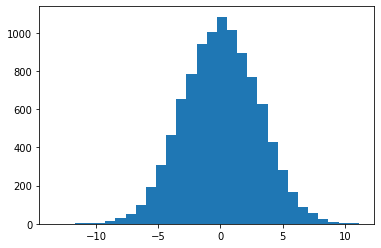

In [42]:
values = pd.Series(norm.rvs(10000))
n, bins, patches = plt.hist(values, density=False, bins=30);
# print(f'n: {n}')
print(f'sum(n): {sum(n)}')
# print(f'bins: {bins}')

In [63]:

unique = sorted(np.round(values).unique())

pdf = norm.pdf(unique)
cdf = norm.cdf(unique)

dist = pd.DataFrame({
    'unique': unique,
    'counts': [values.value_counts().loc[val] for val in unique],
    'normalize': [values.value_counts(normalize=True).loc[val] for val in unique],
    'pdf': [norm.pdf(val) for val in unique],
    'cdf': [norm.cdf(val) for val in unique]
})

dist

KeyError: -12.0

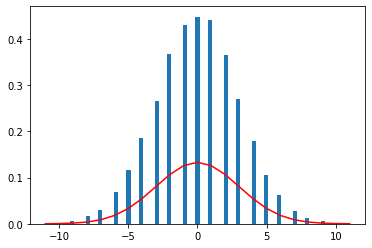

In [18]:
n, bins, patches = plt.hist(values, bins=75, density=True);
pdf_line = plt.plot(dist['unique'], dist['pdf'], label='pdf', c='red');
# cdf_line = plt.plot(dist['unique'], dist['cdf'], label='cdf', c='green');

## Распределение Бернулли
### Функция плотности:
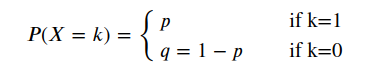
### Пример из реальности:
- бросок (возможно "неправильной") монетки

Вероятность значения 1: 0.3
Вероятность значения 0: 0.7
 


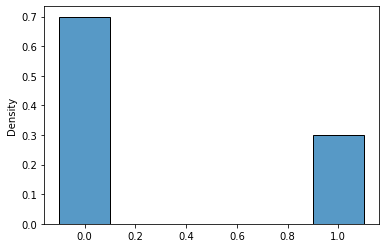

In [17]:
from scipy.stats import bernoulli, binom

p = 0.3
X = bernoulli(p)

# .pmf - Probability Mass Function - посчитать значение из функции плотности

print(f'Вероятность значения 1: {np.round(X.pmf(1),2)}')
print(f'Вероятность значения 0: {np.round(X.pmf(0), 2)}', end='\n \n')

X_samples = X.rvs(100000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

### Посчтитаем среднее значение и стандартное отклонение (дисперсию?)
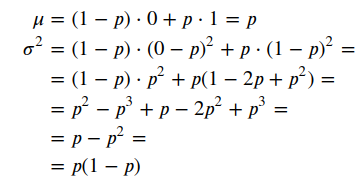

In [18]:
print('Empirically calculated mean: {}'.format(X_samples.mean()))
print('Theoretical mean: {}'.format(p), end='\n \n')

print('Empirically calculated standard deviation: {}'.format(X_samples.std()))
print('Theoretical standard deviation: {}'.format((p*(1-p))**(1/2)))

Empirically calculated mean: 0.30023
Theoretical mean: 0.3
 
Empirically calculated standard deviation: 0.4583578810274784
Theoretical standard deviation: 0.458257569495584


## Равномерное распределение

### Функция плотности:

### Примеры из реальности:
- бросок "правильного" игрального кубика

In [21]:
n_outcomes = 6
n_samples = 30

X_samples = np.array(sum([[i]*(n_samples//n_outcomes) for i in range(n_outcomes)], []))
print(f'X_samples: {X_samples}')

X_samples: [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5]


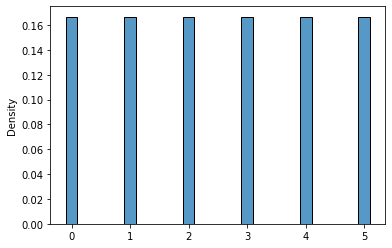

In [22]:
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

In [13]:
print('Empirically calculated mean: {}'.format(X_samples.mean()))
print('Theoretical mean: {}'.format(sum(X_samples)/len(X_samples)), end='\n \n')

Empirically calculated mean: 4.5
Theoretical mean: 4.5
 


In [14]:
print('Empirically calculated standard deviation: {}'.format(X_samples.std()))
# print('Theoretical standard deviation: {}'.format((p*(1-p))**(1/2)))

Empirically calculated standard deviation: 2.8722813232690143


## Биноминальное распределение 
## - распределение суммы исходов тех вещей, которые следуют распределению Бернулли
### Функция плотности:
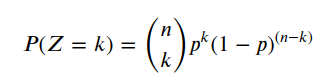, 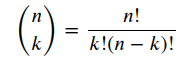

### Примеры из реальности:
- Сумма выпавших орлов после подбрасывания "правильной монеты". 
- Количество белых шаров, после вытаскивания с возварщением из урны с одинаковым количеством белых и черных шаров

In [28]:
n=6
p = 0.3
Y = bernoulli(p)

In [33]:
Y_samples = [Y.rvs(1000000) for i in range(6)]
Z_samples = sum(Y_samples)

print(f"Y: {Y_samples}", end='\n \n')
print(f"Z: {Z_samples}", Z_samples)

Y: [array([0, 0, 0, ..., 0, 0, 0]), array([1, 0, 0, ..., 0, 1, 0]), array([0, 0, 1, ..., 0, 0, 0]), array([0, 1, 1, ..., 0, 1, 1]), array([0, 0, 1, ..., 0, 1, 0]), array([1, 0, 0, ..., 0, 0, 0])]
 
Z: [2 1 3 ... 0 3 1] [2 1 3 ... 0 3 1]


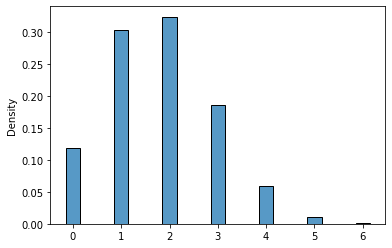

In [36]:
sns.histplot(Z_samples, stat="density", discrete=True, shrink=0.3);

In [35]:
print('Empirically calculated expected value: {}'.format(Z_samples.mean()))
print('Theoretical expected value: {}'.format(n*p), end='\n \n')

print('Empirically calculated variance: {}'.format(Z_samples.var()))
print('Theoretical variance: {}'.format(n*p*(1-p)))

Empirically calculated expected value: 1.798334
Theoretical expected value: 1.7999999999999998
 
Empirically calculated variance: 1.258272824444
Theoretical variance: 1.2599999999999998


## Геометрическое распределение
## - 
### Функция плотности:
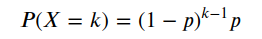
### Примеры из реальности:
- Количество белых шаров, после вытаскивания без возварщения из урны с одинаковым количеством белых и черных шаров

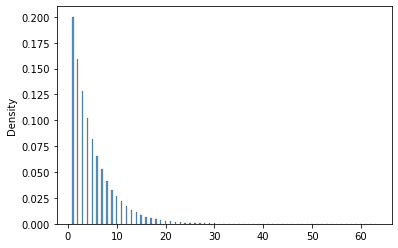

In [39]:
p=0.2
X = np.random.geometric(p, 1000000)

sns.histplot(X, stat="density", discrete=True, shrink=0.3);

In [38]:
print('Theoretical expected value: ' + str(X.mean()))
print('Empirically calculated expected value: ' + str(1/p))

Theoretical expected value: 0.3
Empirically calculated expected value: 3.3333333333333335


## Распределение Пуассона

## – распределение Бернулли при переходе на бесконечность
## – то, о чём надо вспоминать, когда идёт речь о подсчёте событий за определённое время при постоянной заданной интенсивности.

### Примеры из реальности:
- Количество звонков в чат поддержки в единицу времени

## Нормальное распределение

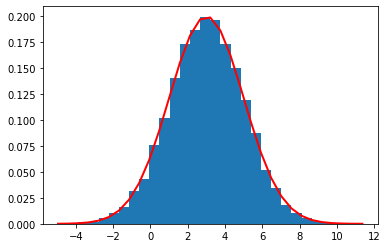

In [9]:
mu = 3 # mean value - среднее значение
sigma = 2 # standart deviation - стандартное отклонение

# Сгенерим нашу генеральную совокупность
s = np.random.normal(mu, sigma, 10000) # сренерируем набор случайных чисел, с нормальных распределением. 

count, bins, ignored = plt.hist(s, 30, density=True) # нарисуем график функции плотности случайной величины

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

## Логистическое распределение

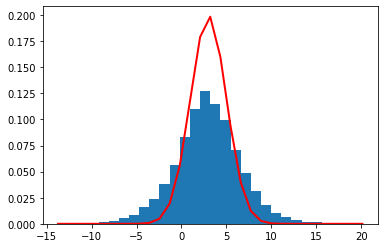

In [10]:
mu = 3 # mean value - среднее значение
sigma = 2 # standart deviation - стандартное отклонение


s = np.random.logistic(mu, sigma, 10000)

count, bins, ignored = plt.hist(s, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

## Экспоненциальное распределение

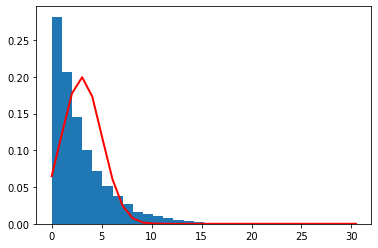

In [11]:
mu = 3 # mean value - среднее значение
sigma = 2 # standart deviation - стандартное отклонение


s = np.random.exponential(mu, 10000)

count, bins, ignored = plt.hist(s, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

## Распределение Парето

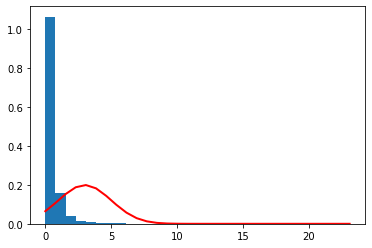

In [12]:
mu = 3 # mean value - среднее значение
sigma = 2 # standart deviation - стандартное отклонение


s = np.random.pareto(mu, 10000)

count, bins, ignored = plt.hist(s, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()